In [7]:
words = open('names.txt', 'r').read().splitlines()
chars = sorted(list(set("".join(words))))
stoi = {c:i+1 for i,c in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [139]:
# create training set
# we want to predict bigram ch1,ch2  
#x=ch1 (what we take as input to nn)
#y=ch2 (what we want to predict)

xs = []
ys = []
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

# tensor need one hot / (float or int..) not strs..
# tensor.Tensor float, tensor.tensor infers dtype
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("Number of examples: ", num)

Number of examples:  228146


In [140]:
# init network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [144]:
# grad desc
alpha = 50
for k in range(100):
    # each row in xenc @ W gives us probabilities of what comes after x_i for each of 27 possible next char. 
    # lets interpret it as log counts, then we take exp (to give us bet 0-1 and then we can take softmax
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W # log-counts
    counts = (xenc @ W).exp()
    probs = counts / counts.sum(1, keepdims=True) # probs for next char given example
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())
    #backward pass
    W.grad = None # set to zero
    loss.backward() #pytorch keeps computational graph
    #update
    W.data += -alpha * W.grad

3.594835042953491
3.277048110961914
3.0970399379730225
2.9813578128814697
2.8994791507720947
2.839292526245117
2.793339490890503
2.756934404373169
2.727195978164673
2.702320098876953
2.6811399459838867
2.6628754138946533
2.6469788551330566
2.6330466270446777
2.6207664012908936
2.6098873615264893
2.600203275680542
2.5915420055389404
2.583759069442749
2.5767338275909424
2.570364236831665
2.5645649433135986
2.5592634677886963
2.55439829826355
2.5499181747436523
2.54577898979187
2.5419435501098633
2.538379430770874
2.535060167312622
2.5319619178771973
2.529064893722534
2.526350975036621
2.523804187774658
2.521411180496216
2.5191597938537598
2.517038345336914
2.5150375366210938
2.5131478309631348
2.5113611221313477
2.509669303894043
2.5080666542053223
2.5065460205078125
2.5051019191741943
2.5037293434143066
2.50242280960083
2.501178503036499
2.4999921321868896
2.4988596439361572
2.4977777004241943
2.4967432022094727
2.495753288269043
2.494805097579956
2.493896484375
2.4930241107940674
2.492

In [ ]:
# What do we expect it to converge to?
# Lower NLL better.. but whats the best we can do? That is the probability of observing the data we are given, that is the maximum likelihood
# 2.47 loss is the same loss we got when we empirical counted and calculated our NLL. that is the prob of our observed data.
# The NN method scales much better.. dont need to load all the counts

In [115]:
# each row in xenc @ W gives us probabilities of what comes after x_i for each of 27 possible next char. 
# lets interpret it as log counts, then we take exp (to give us bet 0-1 and then we can take softmax

logits = xenc @ W # log-counts
counts = (xenc @ W).exp()
probs = counts / counts.sum(1, keepdims=True)
probs[0].sum()



tensor(1.)

In [104]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

tensor([-0.4291, -0.1845,  0.2726,  1.5352,  0.6093,  0.5183, -0.2676, -0.0259,
        -0.9776,  0.2014,  0.2593,  0.3575, -0.6476,  0.4527,  1.5306, -0.8503,
        -1.0024,  0.0538, -0.8991,  2.1286,  0.9050, -0.3684,  0.7863, -0.0198,
        -0.7577,  1.2114,  1.1810])

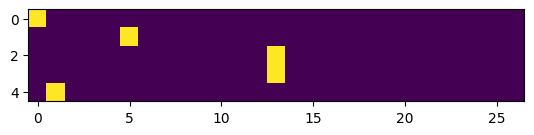

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xenc)

In [27]:
# creating a training set of bigrams
